In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

2025-04-21 04:08:21.743535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745208501.947013      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745208502.004554      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os
dataset_path = "/kaggle/input/cars-dataset/Cars Dataset"
print(os.listdir(dataset_path))


['desktop.ini', 'test', 'train']


In [3]:
train_dir = "/kaggle/input/cars-dataset/Cars Dataset/train"
test_dir = "/kaggle/input/cars-dataset/Cars Dataset/test"

In [4]:
print("Train Classes:", os.listdir(train_dir))
print("Test Classes:", os.listdir(test_dir))

Train Classes: ['Hyundai Creta', 'Tata Safari', 'Swift', 'Mahindra Scorpio', 'Toyota Innova', 'Rolls Royce', 'Audi']
Test Classes: ['Hyundai Creta', 'Tata Safari', 'Swift', 'Mahindra Scorpio', 'Toyota Innova', 'Rolls Royce', 'Audi']


In [5]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [6]:
img_size = (224, 224)
batch_size = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Class names
class_names = list(train_generator.class_indices.keys())
print(f"Car Brands: {class_names}")


Found 2684 images belonging to 7 classes.
Found 668 images belonging to 7 classes.
Found 813 images belonging to 7 classes.
Car Brands: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


In [7]:
# Build Model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

I0000 00:00:1745208544.752713      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40
)

# Save the model
model.save("/content/drive/My Drive/car_brand_model.h5")

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745208595.361843     113 service.cc:148] XLA service 0x7d295c012110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745208595.362560     113 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745208596.320480     113 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/84 ━━━━━━━━━━━━━━━━━━━━ 21:11 15s/step - accuracy: 0.0938 - loss: 3.8617

I0000 00:00:1745208600.434393     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/84 ━━━━━━━━━━━━━━━━━━━━ 63s 577ms/step - accuracy: 0.3566 - loss: 11.8038 - val_accuracy: 0.5554 - val_loss: 1.2176
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 395ms/step - accuracy: 0.4798 - loss: 1.4375 - val_accuracy: 0.6377 - val_loss: 1.0713
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 398ms/step - accuracy: 0.5590 - loss: 1.2833 - val_accuracy: 0.6946 - val_loss: 0.8695
Epoch 4/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 393ms/step - accuracy: 0.5828 - loss: 1.2098 - val_accuracy: 0.6632 - val_loss: 1.0209
Epoch 5/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 394ms/step - accuracy: 0.5768 - loss: 1.1827 - val_accuracy: 0.6632 - val_loss: 0.9478
Epoch 6/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 394ms/step - accuracy: 0.6034 - loss: 1.1709 - val_accuracy: 0.7096 - val_loss: 0.8418
Epoch 7/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 391ms/step - accuracy: 0.6282 - loss: 1.0502 - val_accuracy: 0.7246 - val_loss: 0.8128
Epoch 8/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 393ms/step - accuracy: 0.6201 - loss: 1.0889 - val_accuracy: 0.71

In [9]:
model_version = 1
model_save_path = f"/content/drive/My Drive/Cars_Dataset/Saved_Models/car_brand_model_v{model_version}.h5"

# Create folder if it doesn't exist
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the trained model
model.save(model_save_path)

print(f"✅ Model saved to: {model_save_path}")

✅ Model saved to: /content/drive/My Drive/Cars_Dataset/Saved_Models/car_brand_model_v1.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step


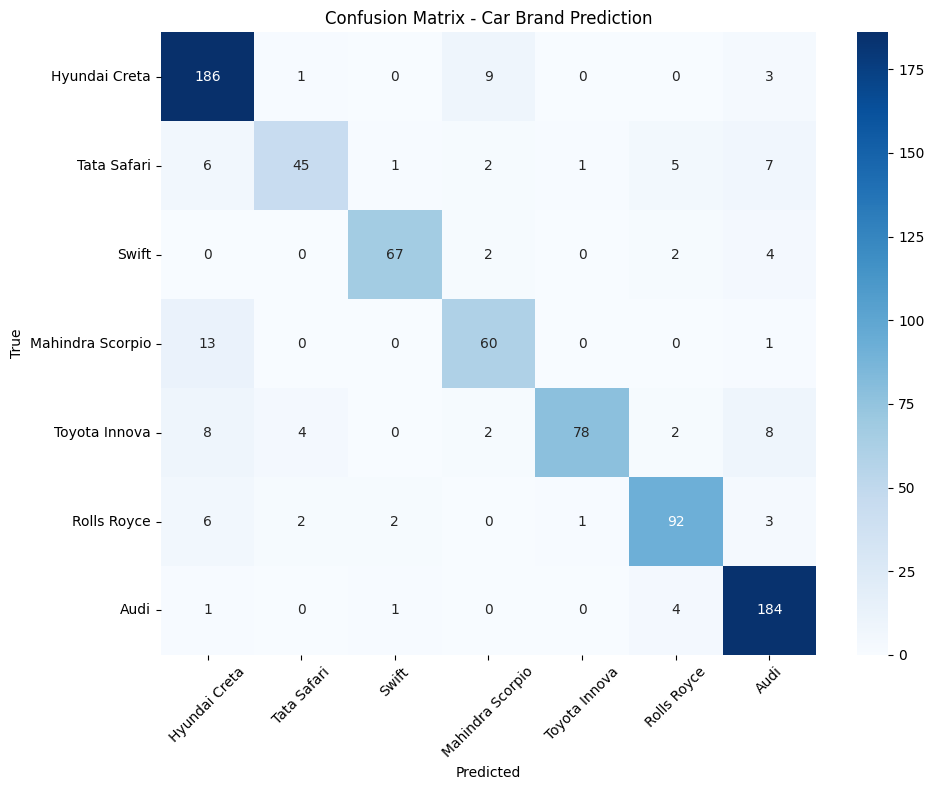

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
model = load_model("/content/drive/My Drive/car_brand_model.h5")

# Evaluation
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hyundai Creta', 'Tata Safari', 'Swift', 'Mahindra Scorpio', 'Toyota Innova', 'Rolls Royce', 'Audi'],
            yticklabels=['Hyundai Creta', 'Tata Safari', 'Swift', 'Mahindra Scorpio', 'Toyota Innova', 'Rolls Royce', 'Audi'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Car Brand Prediction')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Classification Report:
                  precision    recall  f1-score   support

            Audi       0.85      0.93      0.89       199
   Hyundai Creta       0.87      0.67      0.76        67
Mahindra Scorpio       0.94      0.89      0.92        75
     Rolls Royce       0.80      0.81      0.81        74
           Swift       0.97      0.76      0.86       102
     Tata Safari       0.88      0.87      0.87       106
   Toyota Innova       0.88      0.97      0.92       190

        accuracy                           0.88       813
       macro avg       0.88      0.84      0.86       813
    weighted avg       0.88      0.88      0.87       813


Confusion Matrix:
[[186   1   0   9   0   0   3]
 [  6  45   1   2   1   5   7]
 [  0   0  67   2   0   2   4]
 [ 13   0   0  60   0   0   1]
 [  8   4   0   2  78   2   8]
 [  6   2   2   0   1  92   3]
 [  1   0   1   0   0   4 184]]


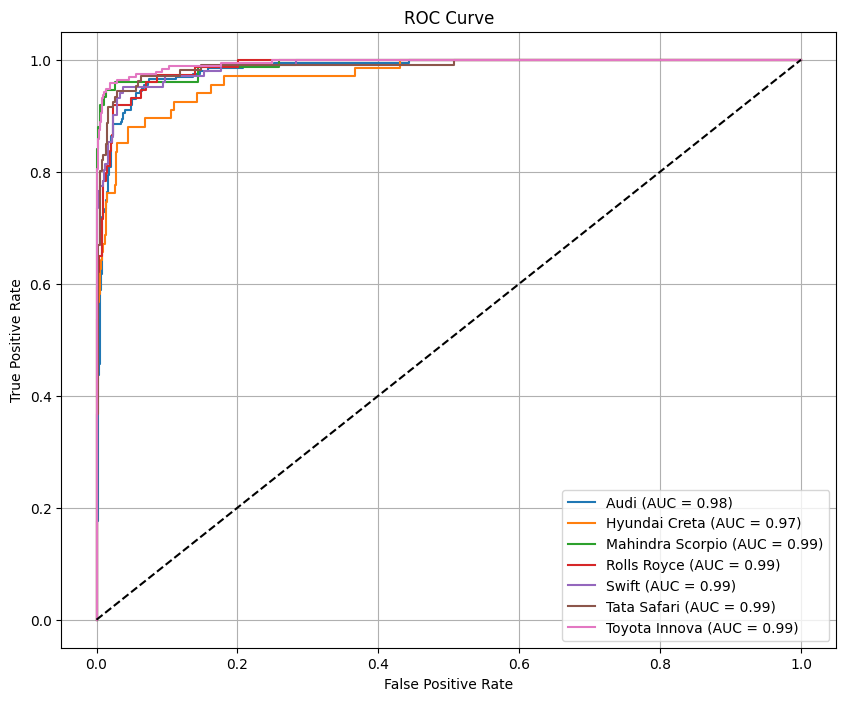

In [18]:
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(test_generator.labels == i, Y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# GENERAL VEHICLE DETECTOR using imagenet model
general_model = MobileNetV2(weights='imagenet')

def is_it_a_car(img_path):
    img = image.load_img(img_path, target_size=img_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = general_model.predict(x)
    decoded = decode_predictions(preds, top=3)[0]
    for _, label, prob in decoded:
        if any(x in label.lower() for x in ["car", "cab", "wagon", "jeep", "limousine", "sports_car", "convertible"]):
            return True
    return False

In [15]:
from tensorflow.keras.models import load_model

model_version = 1
model_load_path = f"/content/drive/My Drive/Cars_Dataset/Saved_Models/car_brand_model_v{model_version}.h5"

# Load the model
model = load_model(model_load_path)

print("✅ Model loaded successfully")


✅ Model loaded successfully


In [19]:
from google.colab import files
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
✅ Predicted: Mahindra Scorpio (Confidence: 1.00)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


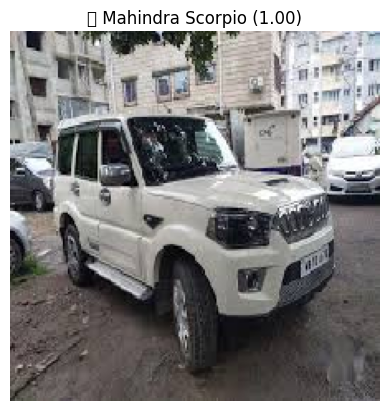

In [21]:
CONFIDENCE_THRESHOLD = 0.6

# Enhanced Prediction with Unknown Handling
def predict_car_brand_with_check(img_path):
    if not is_it_a_car(img_path):
        print("⚠️ This image is not recognized as a car. Please upload a valid car image.")
        plt.imshow(image.load_img(img_path))
        plt.title("🚫 Not a Car Detected")
        plt.axis('off')
        plt.show()
        return

    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    max_confidence = np.max(predictions)
    predicted_class = class_names[np.argmax(predictions)]

    plt.imshow(img)
    plt.axis('off')

    if max_confidence < CONFIDENCE_THRESHOLD:
        plt.title("⚠️ Unknown Car Brand")
        print("⚠️ Warning: The image doesn't appear to match a known car brand.")
    else:
        plt.title(f"✅ {predicted_class} ({max_confidence:.2f})")
        print(f"✅ Predicted: {predicted_class} (Confidence: {max_confidence:.2f})")

    plt.show()


image_path = '/kaggle/input/cars-dataset/Cars Dataset/test/Mahindra Scorpio/112.jpg'  
predict_car_brand_with_check(image_path)


In [22]:
def predict_with_safety(img_path):
    if not is_it_a_car(img_path):
        print("⚠️ This image is not recognized as a car. Please upload a valid car image.")
        return
    predict_car_brand_with_rejection(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
✅ Predicted: Mahindra Scorpio (Confidence: 1.00)


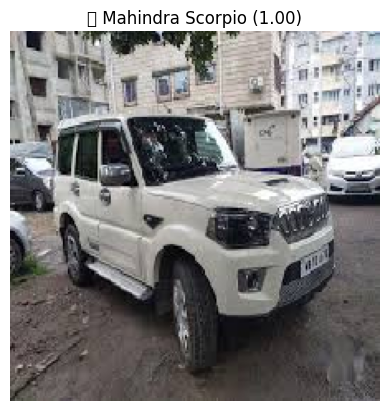

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load the model
from tensorflow.keras.models import load_model
model = load_model("/content/drive/My Drive/car_brand_model.h5")

# Car brand class names
class_names = list(train_generator.class_indices.keys())

# Confidence threshold (adjust if needed)
CONFIDENCE_THRESHOLD = 0.5  # You can tune this (0.5 is reasonable to start)

# Function to predict with rejection logic
def predict_car_brand_with_rejection(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    max_confidence = np.max(predictions)
    predicted_class = class_names[np.argmax(predictions)]

    # Display image
    plt.imshow(img)
    plt.axis('off')

    if max_confidence < CONFIDENCE_THRESHOLD:
        plt.title("⚠️ Unknown Object: Not a Car")
        print("⚠️ Warning: The image doesn't appear to be a known car brand.")
    else:
        plt.title(f"Predicted Car Brand: {predicted_class} ({max_confidence:.2f})")
        print(f"✅ Predicted: {predicted_class} (Confidence: {max_confidence:.2f})")

    plt.show()

image_path = '/kaggle/input/cars-dataset/Cars Dataset/test/Mahindra Scorpio/112.jpg' 
predict_car_brand_with_check(image_path)

